# Final Project
## Author: Jerrin C. Redmon
### CS-430
### December 12, 2022

### Description
##### Link: https://www.kaggle.com/datasets/danushkumarv/glass-identification-data-set




### About Dataset

#### Sources


1. Creator: B. German
-- Central Research Establishment
Home Office Forensic Science Service
Aldermaston, Reading, Berkshire RG7 4PN

2. Donor: Vina Spiehler, Ph.D., DABFT
Diagnostic Products Corporation
(213) 776-0180 (ext 3014)

3. Date: September 1987
Usage

    Rule Induction in Forensic Science
        Ian W. Evett and Ernest J. Spiehler
        Central Research Establishment
        Home Office Forensic Science Service
        Aldermaston, Reading, Berkshire RG7 4PN
        Unknown technical note number (sorry, not listed here)
        General Results: nearest neighbor held its own with respect to the
        rule-based system

Description

Vina conducted a comparison test of her rule-based system, BEAGLE, the nearest-neighbor algorithm, and discriminant analysis. BEAGLE is a product available through VRS Consulting, Inc.; 4676 Admiralty Way, Suite 206; Marina Del Ray, CA 90292 (213) 827-7890 and FAX: -3189. The study of the classification of types of glass was motivated by criminological investigation. At the scene of th, the glass left can be used as evidence…if it is correctly identified!
Number of Instances

214
Number of Attributes

10 (including an Id#) plus the class attribute

    all attributes are continuously valued

Attribute Information

    Id number: 1 to 214
    RI: refractive index
    Na: Sodium (unit measurement: weight percent in the corresponding oxide, as
    are attributes 4-10)
    Mg: Magnesium
    Al: Aluminum
    Si: Silicon
    K: Potassium
    Ca: Calcium
    Ba: Barium
        Fe: Iron
        Type of glass: (class attribute)
            1 buildingwindowsfloat_processed
            2 buildingwindowsnonfloatprocessed
            3 vehiclewindowsfloat_processed
            4 vehiclewindowsnonfloatprocessed (none in this database)
            5 containers
            6 tableware
            7 headlamps

Missing Attribute Values:

None
Class Distribution:

(out of 214 total instances)

    163 Window glass (building windows and vehicle windows)
        87 float processed
            70 building windows
            17 vehicle windows
        76 non-float processed
            76 building windows
            0 vehicle windows
    51 Non-window glass
        13 containers
        9 tableware
        29 headlamps


### Begining of data analysis


#### Imported Libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


#### Importing dataset

In [ ]:
glass = pd.read_csv('/content/glass.csv')

In [ ]:
glass.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
glass.describe()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type of glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


#### Cleaning Data

In [ ]:
#dropping unneeded columns
glass = glass.drop('Id', axis = 1)

In [ ]:
glass.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass'], dtype='object')

In [ ]:
glass.columns = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']

In [ ]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


(array([70., 76.,  0., 17.,  0.,  0., 13.,  0.,  9., 29.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <a list of 10 Patch objects>)

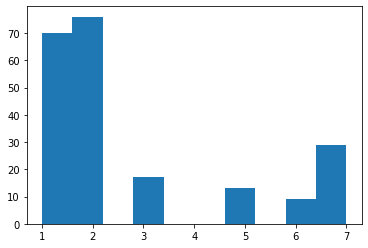

In [ ]:
plt.hist(glass['Type'])

#### Data split and preparation

In [ ]:
#splitting data, setting the target as the type of glass
X = glass.drop('Type', axis = 1)
y = glass['Type']

In [ ]:
from imblearn.over_sampling import SMOTE
#Help with the imbalance in the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [ ]:
#import train test split
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = .2, random_state = 42, stratify = y)

### Model 1: Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_regressor = LogisticRegression(max_iter = 5000)
logistic_regressor.fit(X_train,y_train)

LogisticRegression(max_iter=5000)

In [ ]:
#test score
logistic_regressor.score(X_test,y_test)

0.7065217391304348

In [ ]:
#train score
logistic_regressor.score(X_train, y_train)

0.75

### Model 2: RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
#test score
RFC.score(X_test,y_test)

0.8695652173913043

In [ ]:
#train score
RFC.score(X_train,y_train)

1.0

### Model 3: Support Vector Classifier (SVC)

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [ ]:
#test score
svc.score(X_test,y_test)

0.3695652173913043

In [ ]:
#train score
svc.score(X_train,y_train)

0.3983516483516483

### Model 4: Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
#test score
DTC.score(X_test,y_test)

0.8586956521739131

In [ ]:
#train score
DTC.score(X_train,y_train)

1.0

## Parameter Tuning

##### Model parameters

In [ ]:
model_params = {'SVC':{'model':SVC(gamma = 'auto'),
                       'params':{ 'C':[.1,1,10,20,100],
                                 'kernel':['rbf','linear','poly'],
                                 
     }
  },
  
  'Logistic_Regession':{
      'model':LogisticRegression(),
      'params':{
          'penalty':['l1','l2','elasticnet','none'],
          'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']          
      }
  },
  'Random_Forest':{
      'model':RandomForestClassifier(),
      'params':{
          'criterion':['gini','entropy','log_loss'],
          'max_depth':[2,3,4,5]
      }
  },
  'Decision_Tree':{
      'model':DecisionTreeClassifier(),
      'params':{
          'criterion':['gini','entropy'],
          'max_depth':[2,3,4,5]
      }
  }
}

#### parameter tuning using Grid Search CV

In [ ]:
from sklearn.model_selection import GridSearchCV

best_params = []

for model in model_params:
  grid_model = GridSearchCV(model_params[model]['model'],model_params[model]['params'], verbose = 3, cv = 5)
  grid_model.fit(X_train,y_train)
  best_params.append({
    'model':model,
    'best_score':grid_model.best_score_,
    'best_params':grid_model.best_params_
  })



Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END .................C=0.1, kernel=rbf;, score=0.712 total time=   0.0s
[CV 2/5] END .................C=0.1, kernel=rbf;, score=0.644 total time=   0.0s
[CV 3/5] END .................C=0.1, kernel=rbf;, score=0.699 total time=   0.0s
[CV 4/5] END .................C=0.1, kernel=rbf;, score=0.616 total time=   0.0s
[CV 5/5] END .................C=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.767 total time=   0.0s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.589 total time=   0.0s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.712 total time=   0.0s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.726 total time=   0.0s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.681 total time=   0.0s
[CV 1/5] END ................C=0.1, kernel=poly;, score=0.890 total time=   0.2s
[CV 2/5] END ................C=0.1, kernel=poly;

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END ......penalty=l1, solver=liblinear;, score=0.658 total time=   0.1s
[CV 3/5] END ......penalty=l1, solver=liblinear;, score=0.712 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END ......penalty=l1, solver=liblinear;, score=0.740 total time=   0.1s
[CV 5/5] END ......penalty=l1, solver=liblinear;, score=0.653 total time=   0.1s
[CV 1/5] END ..............penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END ..............penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END ..............penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END ..............penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END ..............penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END ...........penalty=l1, solver=saga;, score=0.685 total time=   0.0s
[CV 2/5] END ...........penalty=l1, solver=saga;, score=0.575 total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the co

[CV 3/5] END ...........penalty=l1, solver=saga;, score=0.740 total time=   0.0s
[CV 4/5] END ...........penalty=l1, solver=saga;, score=0.603 total time=   0.0s
[CV 5/5] END ...........penalty=l1, solver=saga;, score=0.681 total time=   0.0s
[CV 1/5] END ......penalty=l2, solver=newton-cg;, score=0.753 total time=   0.2s
[CV 2/5] END ......penalty=l2, solver=newton-cg;, score=0.699 total time=   0.2s
[CV 3/5] END ......penalty=l2, solver=newton-cg;, score=0.699 total time=   0.2s
[CV 4/5] END ......penalty=l2, solver=newton-cg;, score=0.740 total time=   0.2s
[CV 5/5] END ......penalty=l2, solver=newton-cg;, score=0.694 total time=   0.2s
[CV 1/5] END ..........penalty=l2, solver=lbfgs;, score=0.740 total time=   0.1s
[CV 2/5] END ..........penalty=l2, solver=lbfgs;, score=0.699 total time=   0.0s
[CV 3/5] END ..........penalty=l2, solver=lbfgs;, score=0.740 total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

[CV 4/5] END ..........penalty=l2, solver=lbfgs;, score=0.753 total time=   0.1s
[CV 5/5] END ..........penalty=l2, solver=lbfgs;, score=0.694 total time=   0.1s
[CV 1/5] END ......penalty=l2, solver=liblinear;, score=0.740 total time=   0.0s
[CV 2/5] END ......penalty=l2, solver=liblinear;, score=0.658 total time=   0.0s
[CV 3/5] END ......penalty=l2, solver=liblinear;, score=0.699 total time=   0.0s
[CV 4/5] END ......penalty=l2, solver=liblinear;, score=0.740 total time=   0.0s
[CV 5/5] END ......penalty=l2, solver=liblinear;, score=0.667 total time=   0.0s
[CV 1/5] END ............penalty=l2, solver=sag;, score=0.699 total time=   0.0s
[CV 2/5] END ............penalty=l2, solver=sag;, score=0.603 total time=   0.0s
[CV 3/5] END ............penalty=l2, solver=sag;, score=0.740 total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ di

[CV 4/5] END ............penalty=l2, solver=sag;, score=0.644 total time=   0.0s
[CV 5/5] END ............penalty=l2, solver=sag;, score=0.681 total time=   0.0s
[CV 1/5] END ...........penalty=l2, solver=saga;, score=0.712 total time=   0.0s
[CV 2/5] END ...........penalty=l2, solver=saga;, score=0.575 total time=   0.0s
[CV 3/5] END ...........penalty=l2, solver=saga;, score=0.740 total time=   0.0s
[CV 4/5] END ...........penalty=l2, solver=saga;, score=0.603 total time=   0.0s
[CV 5/5] END ...........penalty=l2, solver=saga;, score=0.653 total time=   0.0s
[CV 1/5] END penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END ....penalty=ela

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means 

[CV 3/5] END ......penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END ......penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END ......penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END .....penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END .....penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 3/5] END .....penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 4/5] END .....penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 5/5] END .....penalty=elasticnet, solver=saga;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 1/5] END ....penalty=none, solver=newton-cg;, score=0.863 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 2/5] END ....penalty=none, solver=newton-cg;, score=0.795 total time=   1.0s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 3/5] END ....penalty=none, solver=newton-cg;, score=0.795 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 4/5] END ....penalty=none, solver=newton-cg;, score=0.781 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.htm

[CV 5/5] END ....penalty=none, solver=newton-cg;, score=0.833 total time=   0.5s
[CV 1/5] END ........penalty=none, solver=lbfgs;, score=0.767 total time=   0.0s
[CV 2/5] END ........penalty=none, solver=lbfgs;, score=0.740 total time=   0.0s
[CV 3/5] END ........penalty=none, solver=lbfgs;, score=0.781 total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

[CV 4/5] END ........penalty=none, solver=lbfgs;, score=0.767 total time=   0.1s
[CV 5/5] END ........penalty=none, solver=lbfgs;, score=0.708 total time=   0.0s
[CV 1/5] END ......penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END ......penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END ......penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END ......penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END ......penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END ..........penalty=none, solver=sag;, score=0.699 total time=   0.0s
[CV 2/5] END ..........penalty=none, solver=sag;, score=0.603 total time=   0.0s
[CV 3/5] END ..........penalty=none, solver=sag;, score=0.740 total time=   0.0s
[CV 4/5] END ..........penalty=none, solver=sag;, score=0.644 total time=   0.0s
[CV 5/5] END ..........penalty=none, solver=sag;, score=0.681 total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
45 fits failed out of a tota

[CV 1/5] END .........penalty=none, solver=saga;, score=0.712 total time=   0.0s
[CV 2/5] END .........penalty=none, solver=saga;, score=0.575 total time=   0.0s
[CV 3/5] END .........penalty=none, solver=saga;, score=0.740 total time=   0.0s
[CV 4/5] END .........penalty=none, solver=saga;, score=0.603 total time=   0.0s
[CV 5/5] END .........penalty=none, solver=saga;, score=0.653 total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END .......criterion=gini, max_depth=2;, score=0.808 total time=   0.2s
[CV 2/5] END .......criterion=gini, max_depth=2;, score=0.726 total time=   0.2s
[CV 3/5] END .......criterion=gini, max_depth=2;, score=0.795 total time=   0.2s
[CV 4/5] END .......criterion=gini, max_depth=2;, score=0.767 total time=   0.2s
[CV 5/5] END .......criterion=gini, max_depth=2;, score=0.750 total time=   0.2s
[CV 1/5] END .......criterion=gini, max_depth=3;, score=0.849 total time=   0.2s
[CV 2/5] END .......criterion=gini, max_depth=3;, score=0.753 total time=   0.2s
[CV 3/5] END .......criterion=gini, max_depth=3;, score=0.808 total time=   0.2s
[CV 4/5] END .......criterion=gini, max_depth=3;, score=0.808 total time=   0.2s
[CV 5/5] END .......criterion=gini, max_depth=3;, score=0.778 total time=   0.2s
[CV 1/5] END .......criterion=gini, max_depth=4;, score=0.863 total time=   0.2s
[CV 2/5] END .......criterion=gini, max_depth=4;

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", l

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .......criterion=gini, max_depth=2;, score=0.575 total time=   0.0s
[CV 2/5] END .......criterion=gini, max_depth=2;, score=0.589 total time=   0.0s
[CV 3/5] END .......criterion=gini, max_depth=2;, score=0.575 total time=   0.0s
[CV 4/5] END .......criterion=gini, max_depth=2;, score=0.575 total time=   0.0s
[CV 5/5] END .......criterion=gini, max_depth=2;, score=0.569 total time=   0.0s
[CV 1/5] END .......criterion=gini, max_depth=3;, score=0.795 total time=   0.0s
[CV 2/5] END .......criterion=gini, max_depth=3;, score=0.712 total time=   0.0s
[CV 3/5] END .......criterion=gini, max_depth=3;, score=0.726 total time=   0.0s
[CV 4/5] END .......criterion=gini, max_depth=3;, score=0.781 total time=   0.0s
[CV 5/5] END .......criterion=gini, max_depth=3;, score=0.750 total time=   0.0s
[CV 1/5] END .......criterion=gini, max_depth=4;, score=0.822 total time=   0.0s
[CV 2/5] END .......criterion=gini, max_depth=4;,

In [ ]:
best_params

[{'model': 'SVC',
  'best_score': 0.8405631659056316,
  'best_params': {'C': 100, 'kernel': 'rbf'}},
 {'model': 'Logistic_Regession',
  'best_score': 0.8132420091324202,
  'best_params': {'penalty': 'none', 'solver': 'newton-cg'}},
 {'model': 'Random_Forest',
  'best_score': 0.8679984779299847,
  'best_params': {'criterion': 'entropy', 'max_depth': 5}},
 {'model': 'Decision_Tree',
  'best_score': 0.8433409436834095,
  'best_params': {'criterion': 'gini', 'max_depth': 4}}]

In [ ]:
df = pd.DataFrame(best_params,columns=['model','best_score','best_params'])

In [ ]:
df.head()

,model,best_score,best_params
0,SVC,0.840563,"{'C': 100, 'kernel': 'rbf'}"
1,Logistic_Regession,0.813242,"{'penalty': 'none', 'solver': 'newton-cg'}"
2,Random_Forest,0.867998,"{'criterion': 'entropy', 'max_depth': 5}"
3,Decision_Tree,0.843341,"{'criterion': 'gini', 'max_depth': 4}"


### ANN with 3 Dense Layers

##### Resplit the data without fixing the imbalance

In [ ]:
X = glass.drop('Type', axis = 1)
y = glass['Type']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = .2, random_state = 42, stratify = y)

#### Scaling data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### building ANN Model

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
def build_model(unit):
  #Creating the layers of the NN
  model = Sequential()
  model.add(Dense(units = unit, activation = 'relu', input_shape = (9,)))
  model.add(Dense(units = unit, activation = 'relu'))
  model.add(Dense(units = unit, activation = 'softmax'))
  model.add(Dense(units = 1, activation = 'sigmoid'))
  model.compile(optimizer = 'adam', loss  = 'binary_crossentropy', metrics = ['accuracy'])
  return model

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
model = KerasClassifier(build_fn = build_model)

<ipython-input-46-267db9bfadcf>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = build_model)


In [ ]:
params = {'batch_size':[1,3,5,10,20],
          'nb_epoch':[1,5,10,30,50,100],
          'unit':[3,5,10,15,20]}

### Grid Search for best parameters and score

In [ ]:
grid_search = GridSearchCV(estimator = model, param_grid = params)
grid_search = grid_search.fit(X_train,y_train)

7/7 [==============================] - 1s 4ms/step - loss: 1.5220 - accuracy: 0.3285


7/7 [==============================] - 1s 3ms/step - loss: 0.5404 - accuracy: 0.3650


18/18 [==============================] - 1s 3ms/step - loss: 0.5763 - accuracy: 0.3567


In [ ]:
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_
print("Best parameters :", best_parameters, "Best accuracy : ", best_score)

Best parameters : {'batch_size': 10, 'nb_epoch': 10, 'unit': 10} Best accuracy :  0.4210084080696106


In [ ]:
y_pred = grid_search.predict(X_test)
y_pred = y_pred > 0.5

2/2 [==============================] - 0s 7ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test,y_pred)


array([[14,  0,  0,  0,  0,  0],
       [15,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0],
       [ 6,  0,  0,  0,  0,  0]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.33      1.00      0.49        14
           2       0.00      0.00      0.00        15
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         6

    accuracy                           0.33        43
   macro avg       0.05      0.17      0.08        43
weighted avg       0.11      0.33      0.16        43



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
